# Assignment 2

## Data

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The data was taken from Kaggle. The `athlete_events` Dataset contains $271,116$ rows and $15$ columns.

**Source:**

Griffin, R, H (2018) 120 years of Olympic history: athletes and results, athlete_events, Found at: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv

**ATTRIBUTES:**

**athlete_events.csv**

| Column Name | Data Type | Description/Notes |
|:----:|:----:|:----|
| ID |  integer | Unique number for each athlete |
| Name | string | Athlete’s name |
| Sex | string | M or F |
| Age | integer |  |
| Height | integer | In centimeters |
| Weight | integer | In kilograms |
| Team | string | Team name |
| NOC | string | National Olympic Committee, 3 letter code (Matches with `NOC` from noc_regions.csv) |
| Games | string | Year and season |
| Year | integer |  |
| Season | string | Summer or Winter |
| City | string | Host city |
| Sport | string |  |
| Event | string |  |
| Medal | string | Gold, Silver, Bronze, or NA |

Download athlete_events.csv from the link above and load it into a DataFrame called `athlete_events` (also can be found in the [course repo](https://github.com/soltaniehha/Intro-to-Data-Analytics/tree/main/data)):

In [83]:
import pandas as pd
import numpy as np
athlete_events = pd.read_csv('/Users/aleksanderlazowski/Documents/GitHub/Intro-to-Data-Analytics/data/athlete_events.csv')

Use `info()` method on this DataFrame to get a sense of the data:

In [20]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Question 1
Clearly not every athlete receives a medal in the olympics. How many records have a non-null value for `Medal` field? In other words, how many medals were given according to this dataset?

In [17]:
# Your answer goes here
athlete_events['Medal'].notnull().sum()

39783

Use the `head()` method to inspect the first few rows of the data:

In [13]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Question 2

What is the minimum and maximum `Year`?

In [44]:
athlete_events['Year'].min()

1896

In [45]:
athlete_events['Year'].max()

2016

## Question 3

Is the following statement True or False?

> Average age of female athletes who attended the olympic games after 1990 has raised when compared to the era before then.

In [94]:
avg_age = athlete_events[(athlete_events["Year"] > 1990) & (athlete_events['Sex'] == 'F') & (athlete_events['Age'])].mean()
avg_age2 = athlete_events[(athlete_events["Year"] < 1990) & (athlete_events['Sex'] == 'F') & (athlete_events['Age'])].mean()
answr1 = avg_age['Age']
answr2 = avg_age2['Age']
print('The statement is False, avergae age of females before 1990 was {} and avergae age after 1990 was {}'.format(answr1.round(), answr2.round()))

The statement is False, avergae age of females before 1990 was 25.0 and avergae age after 1990 was 22.0


## Question 4

How many Gold medals were given to men from 1970 to 2000 (including both years)?

In [71]:
Year_val = athlete_events[(athlete_events["Year"] >= 1970) & (athlete_events["Year"] <= 2000) & (athlete_events['Medal'] == 'Gold') & (athlete_events['Sex'] == 'M')]
Year_val['Medal'].count()

3207

## Question 5

How many athletes attended the olympic games in 1968?

Hint: You can use the method `.unique()` on any pandas Series to get the unique values. Any column subset of a DataFrame returns a Series object.

In [101]:
attendance = athlete_events[(athlete_events['Year'] == 1968) & (athlete_events['Name'])]
names = attendance['Name'].drop_duplicates()
names.count()

6711

## Question 6

Who won the event "Swimming Men's 100 metres Breaststroke" in 2004? Please note that there is a typo in the Event description!

In [113]:
Winner = athlete_events[(athlete_events['Year'] == 2004) & (athlete_events['Name']) & (athlete_events['Medal'] == 'Gold') & (athlete_events['Event'] == "Swimming Men's 100 metres Breaststroke")]
Winner["Name"]

120309    Kosuke Kitajima
Name: Name, dtype: object

## Question 7

Using the `athlete_events` dataframe and **seaborn** and/or **Matplotlib** library, create a plot to describe a portion of the dataset. This question is left open intentionally. To get the full points, make sure to customize your plot and produce a meaningful graph that follows best practices. For instance, it should have a title, and axes labels; it should be readable and insightful for an audience that is not familiar with the dataset.

In [ ]:
g = sns.catplot(x="index", y="Medal", data=Top,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')


In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

GoldMedals = athlete_events[athlete_events['Medal'] == 'Gold'].value_counts()



10167

/Users/aleksanderlazowski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of silver Medals')

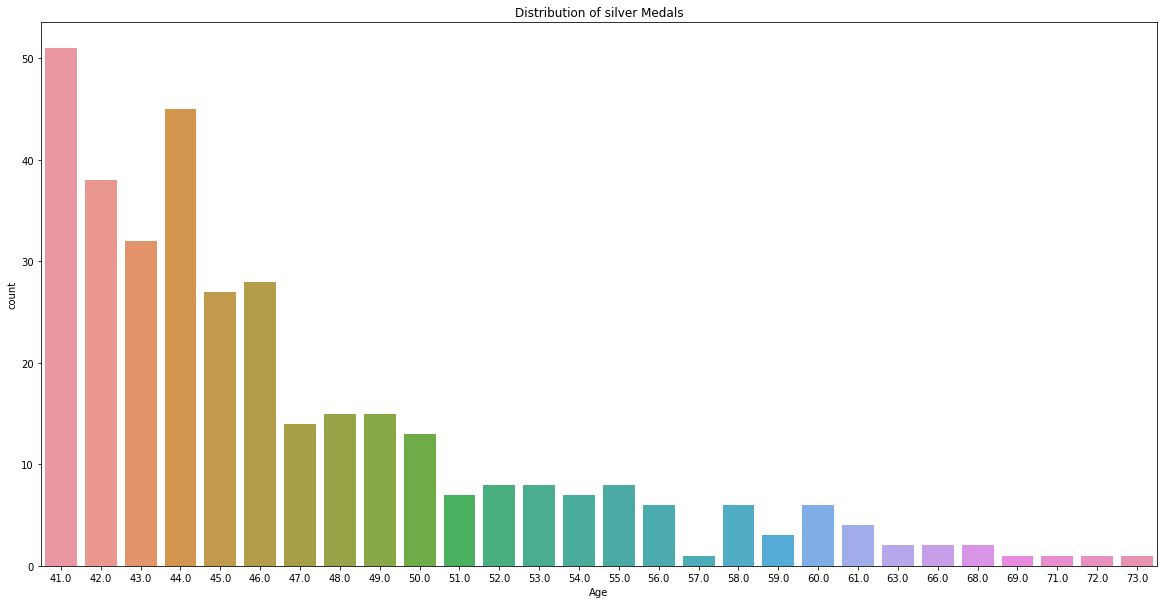

In [199]:

GoldMedals = athlete_events[(athlete_events['Medal'] == 'Silver') & (athlete_events["Age"] > 40)]


plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(GoldMedals['Age'])
plt.title('Distribution of silver Medals')